In [115]:
import pandas as pd
import matplotlib.pyplot as plt


plt.rcParams["text.usetex"] = True
plt.rcParams['text.latex.unicode'] = True
plt.rcParams["font.family"] = "serif"

%matplotlib inline
plt.rcParams["figure.dpi"] = 300

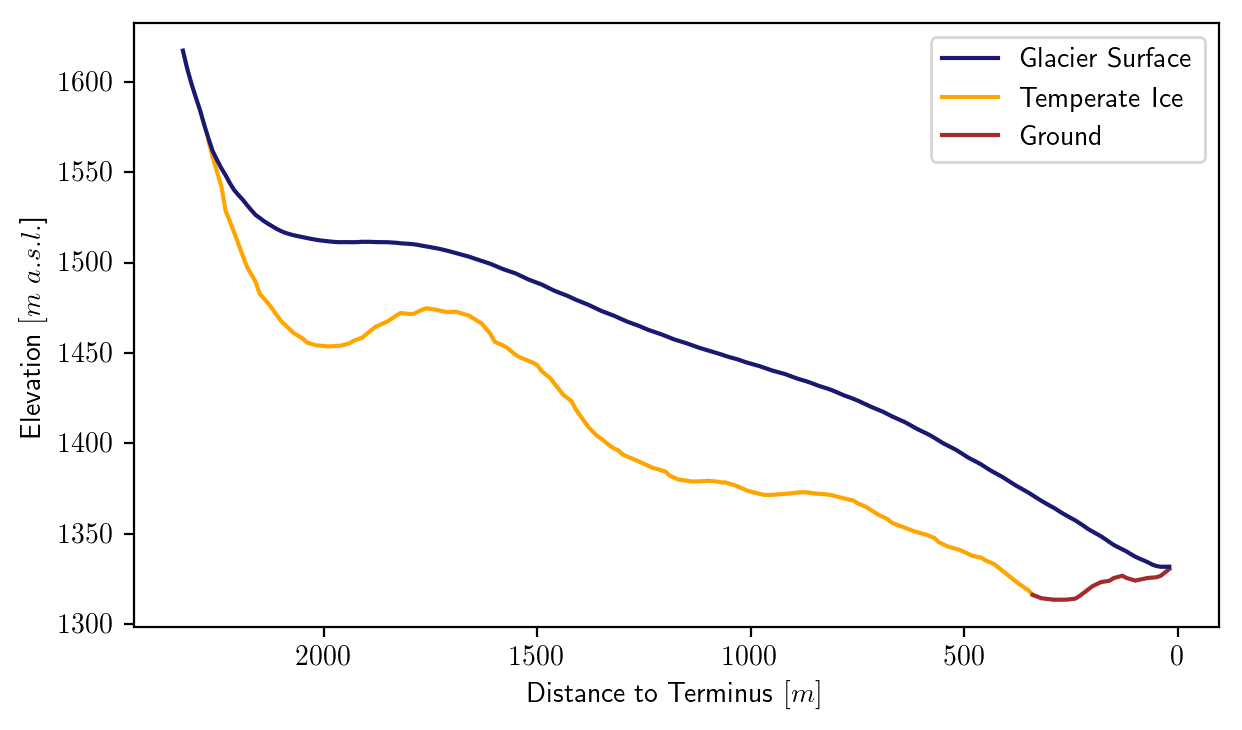

In [13]:
# MÅRMAGLACIÄREN

data = pd.read_csv("profile_180510.csv")
data.index *= 10
data = data.rolling(3).mean()

# Last 36 points are ground. Rest is temperate ice
data["ground"] = data["surface"].iloc[:35]
data["surface"] = data["surface"].iloc[34:]  # With some visually good overlap

# Remove values where temperate is higher than glacier
data["surface"] = data["surface"][data["surface"] < data["glacier"]]

plt.figure(figsize=(7, 4))

colors = ["midnightblue", "orange", "brown"]
labels = ["Glacier Surface", "Temperate Ice", "Ground"]
zorders = [3, 1, 2]

for i, col in enumerate(["glacier", "surface", "ground"]):
    plt.plot(data[col], c=colors[i], zorder=zorders[i], label=labels[i])

plt.ylabel("Elevation $[m\ a.s.l.$]")
plt.xlabel("Distance to Terminus $[m]$")
plt.legend()
plt.gca().invert_xaxis()

plt.savefig("export/Marma_cross_section_180510", dpi=300)

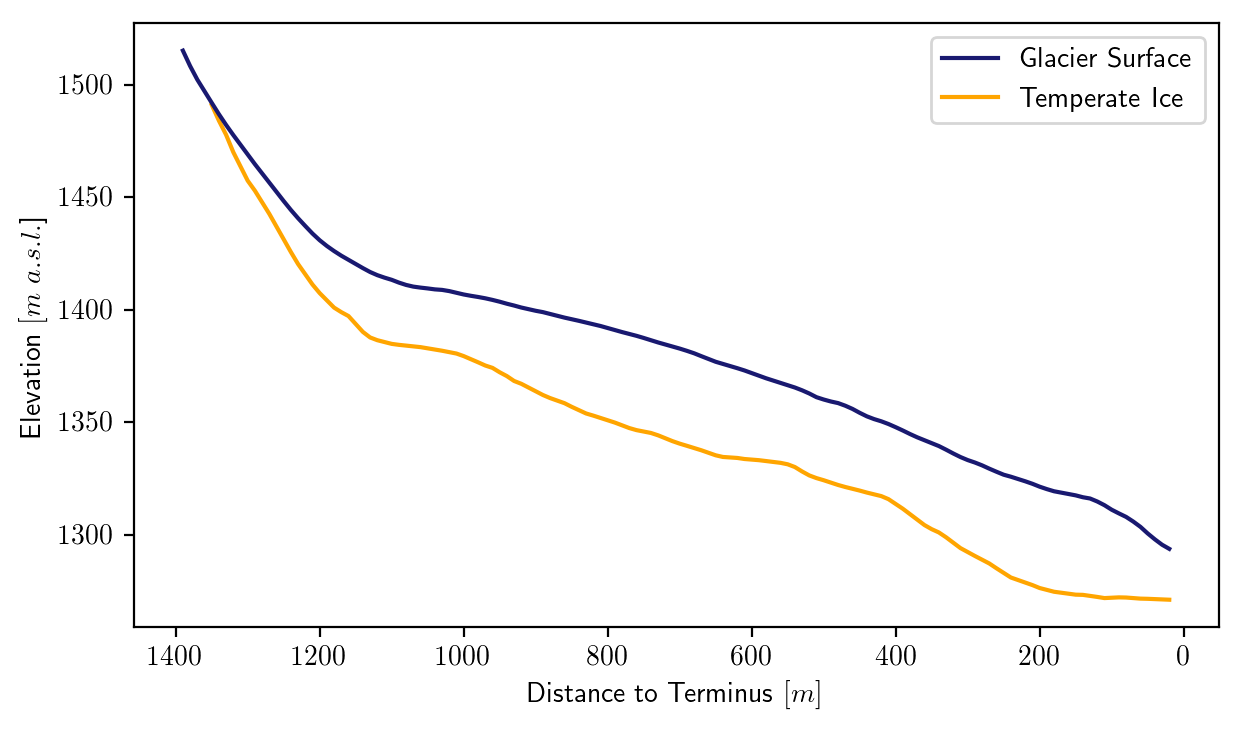

In [12]:
# MÅRMAPAKTEGLACIÄREN

data = pd.read_csv("MarPak_profile_180511.csv")
data.index *= 10
data = data.rolling(3).mean()

# Remove values where temperate is higher than glacier
data["surface"] = data["surface"][data["surface"] < data["glacier"]]

plt.figure(figsize=(7, 4))

colors = ["midnightblue", "orange"]
labels = ["Glacier Surface", "Temperate Ice"]
zorders = [3, 1]

for i, col in enumerate(["glacier", "surface"]):
    plt.plot(data[col], c=colors[i], zorder=zorders[i], label=labels[i])

plt.ylabel("Elevation $[m\ a.s.l.$]")
plt.xlabel("Distance to Terminus $[m]$")
plt.legend()
plt.gca().invert_xaxis()

plt.savefig("export/MarPak_cross_section_180511", dpi=300)

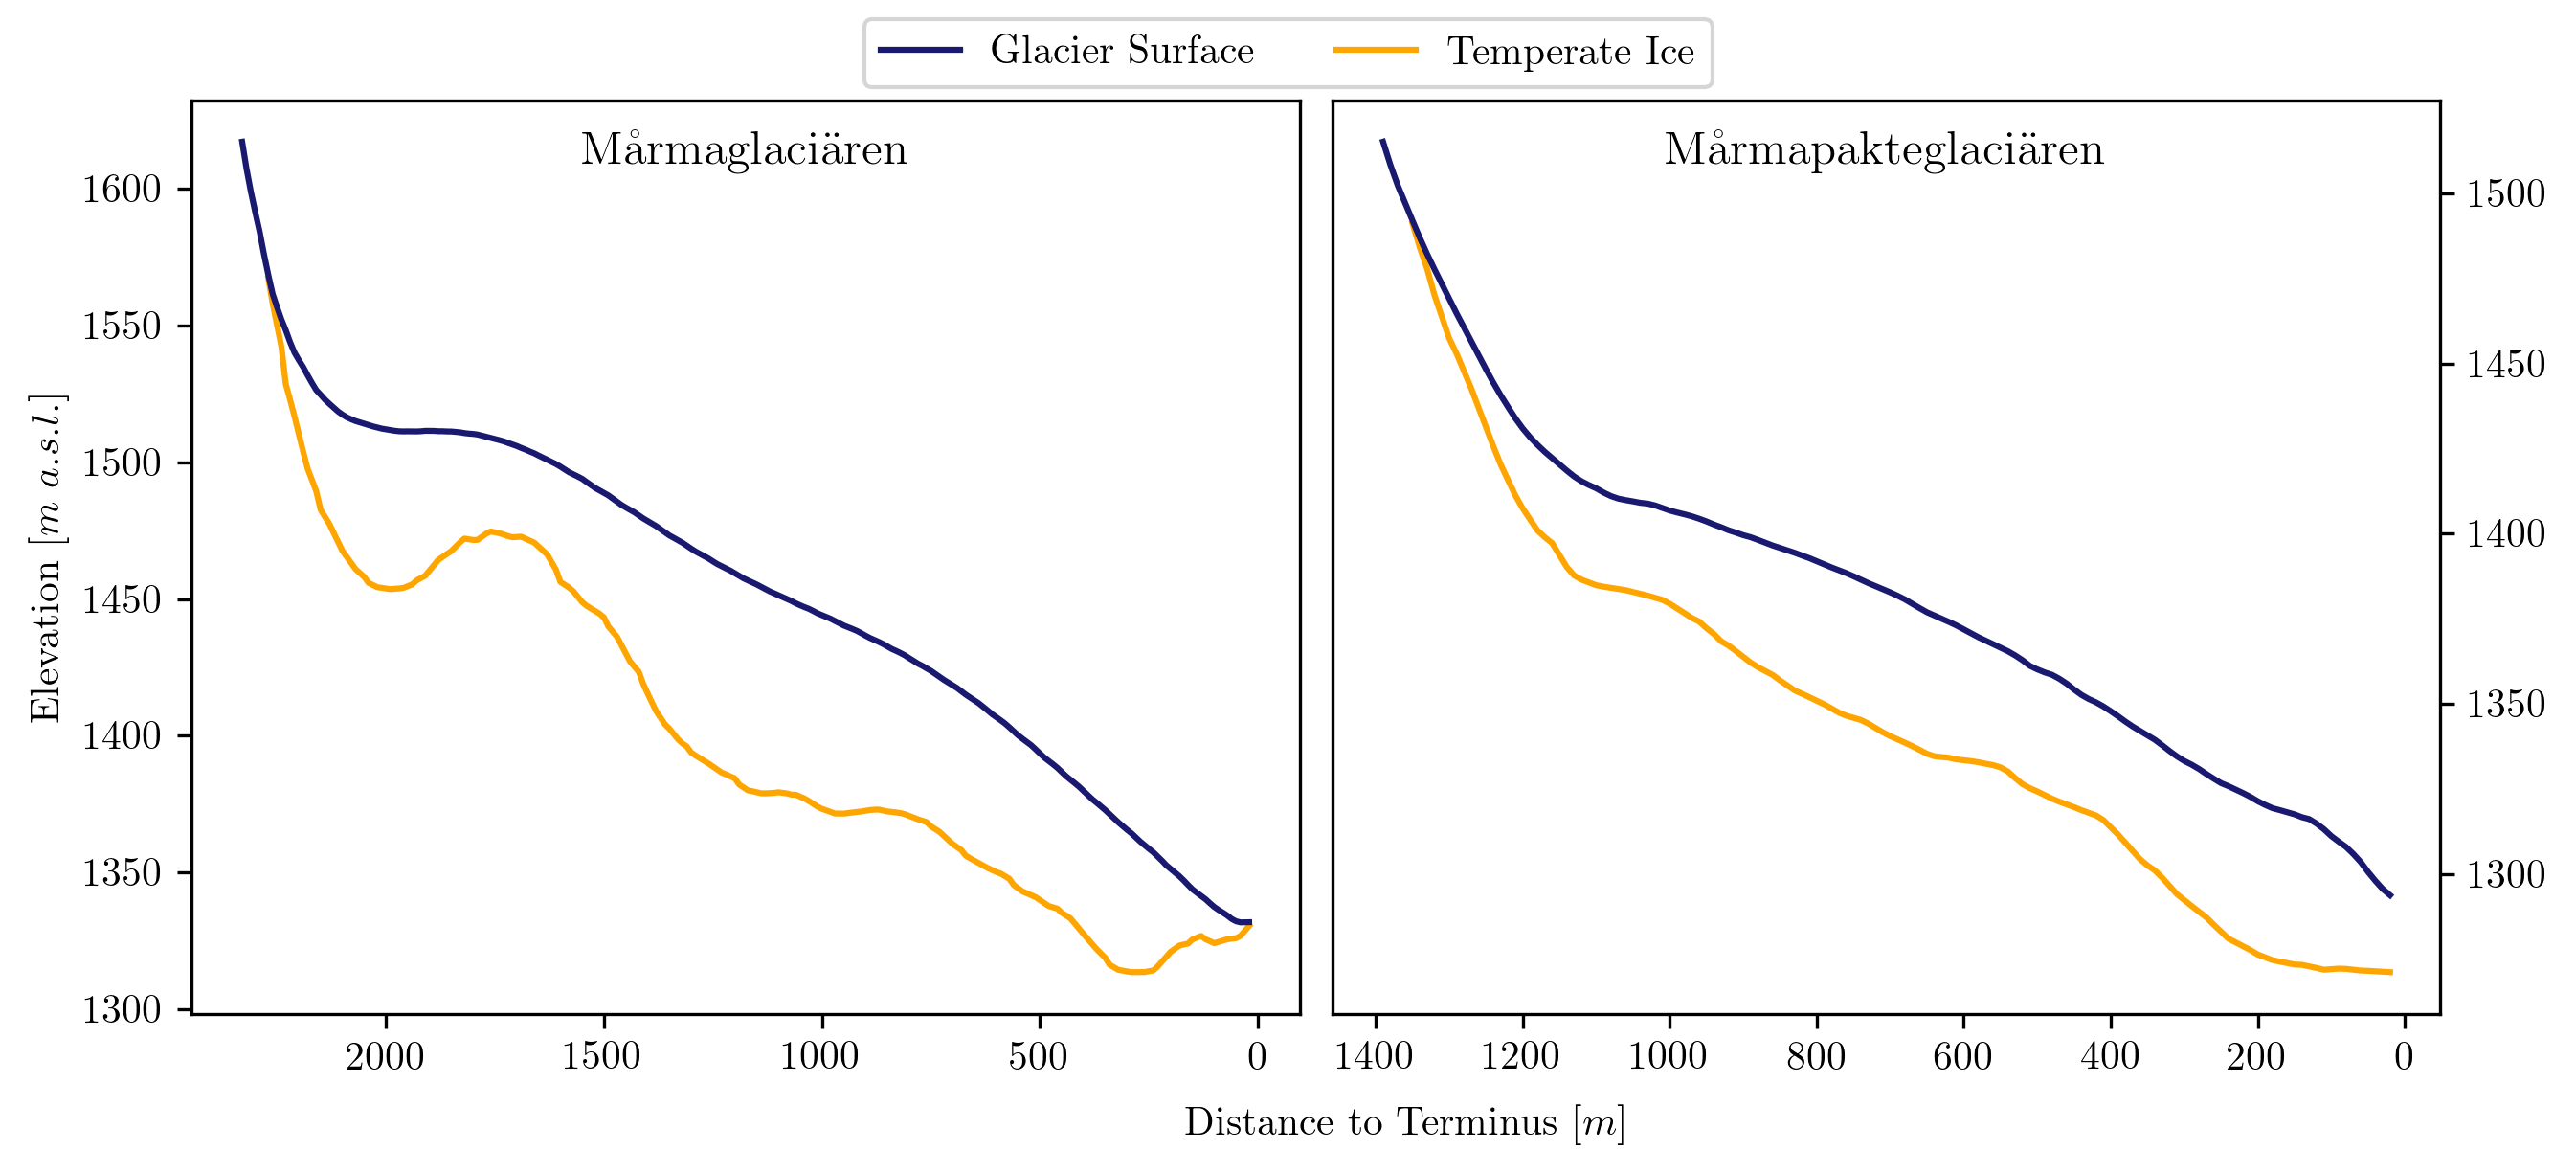

In [116]:
marpak = pd.read_csv("MarPak_profile_180511.csv").rolling(3).mean().dropna()
marma = pd.read_csv("profile_180510.csv").rolling(3).mean().dropna()

for df in [marpak, marma]:
    df.index *= 10
        
    # Remove values where temperate is higher than glacier
    df["surface"] = df["surface"][df["surface"] < df["glacier"]]



fig = plt.figure(figsize=(9, 4))

colors = ["midnightblue", "orange"]
labels = ["Glacier Surface", "Temperate Ice"]
titles = ["Mårmaglaciären", "Mårmapakteglaciären"]
subplots = [121, 122]

for i1, df in enumerate([marma, marpak]):
    plt.subplot(subplots[i1])
    
    for i2, col in enumerate(["glacier", "surface"]):
        plt.plot(df[col], c=colors[i2], zorder=2 - i2, label=(labels[i2] if i1 == 0 else "_nolegend_"))

    
    if i1 == 0:
        plt.ylabel("Elevation $[m\ a.s.l.$]")
    elif i1 == 1:
        plt.gca().yaxis.tick_right()
    
    plt.text(0.5, 0.93, titles[i1], transform=plt.gca().transAxes, ha="center", fontsize=12)  # Titles
    #plt.legend(loc="lower left")
    plt.gca().invert_xaxis()

plt.figlegend(loc="upper center", ncol=2) 

plt.text(0.54, 0.02, "Distance to Terminus $[m]$", transform=fig.transFigure, ha="center")
plt.subplots_adjust(left=0.07, bottom=None, right=0.94, top=0.92, wspace=0.03, hspace=None)

#plt.savefig("export/Comb_cross_section_180511", dpi=300)

